# GLASS IDENTIFICATION

### LOADING THE LIBRARIES

In [151]:
#importing the required libraries for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin #to create new class for transformation
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import train_test_split , KFold, StratifiedKFold, cross_val_score, GridSearchCV, learning_curve, validation_curve
from sklearn.pipeline import Pipeline #streaming pipelines
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix,classification_report



In [94]:
#load data
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [95]:
features = df.columns[:-1].tolist()
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [96]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [97]:
#statistical summary
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### Here the features are not in same scale.. for eg. Si has a mean value of 72.65 on the other hand Fe has a mean of 0.0057.

In [98]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

#### the data here is imbalanced the instances of types 1,2 consist 67% or more glass types

## DATA VISUALIZATION

In [99]:
#univariate analysis

C:\Users\soumy\anaconda11\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


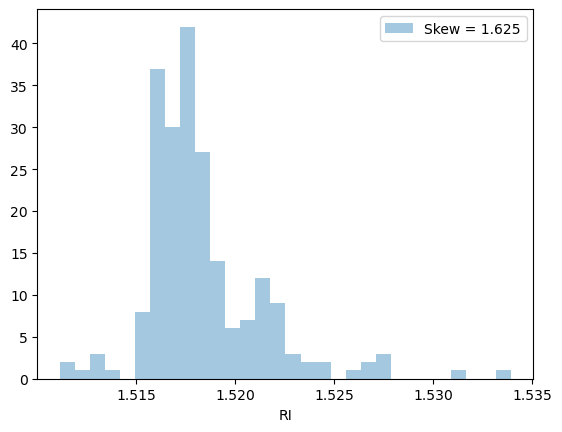

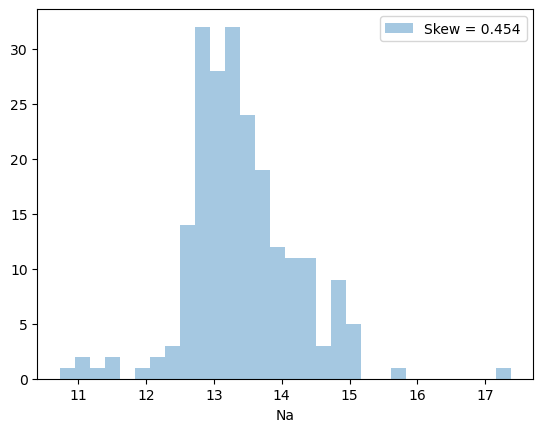

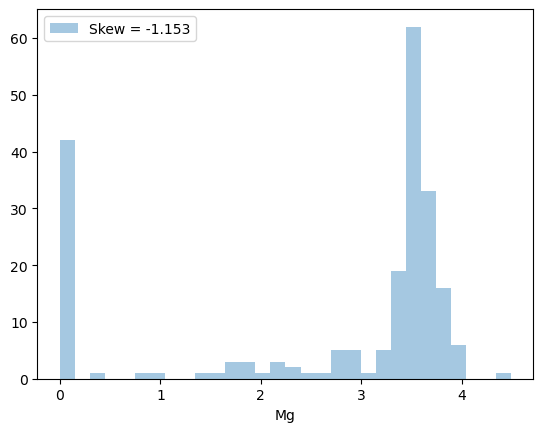

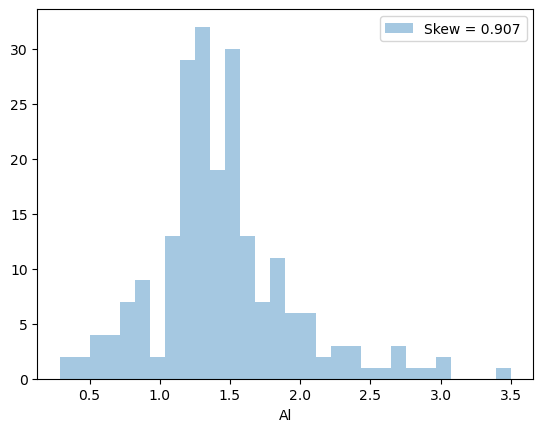

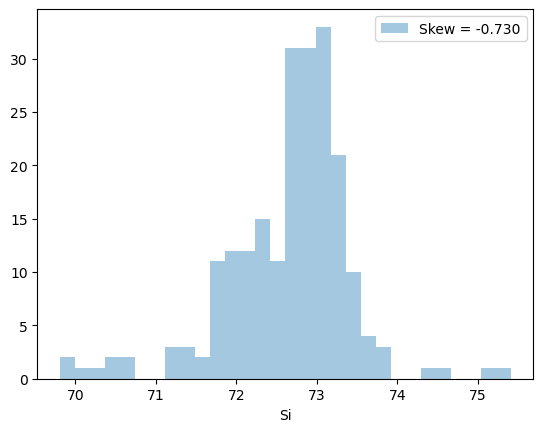

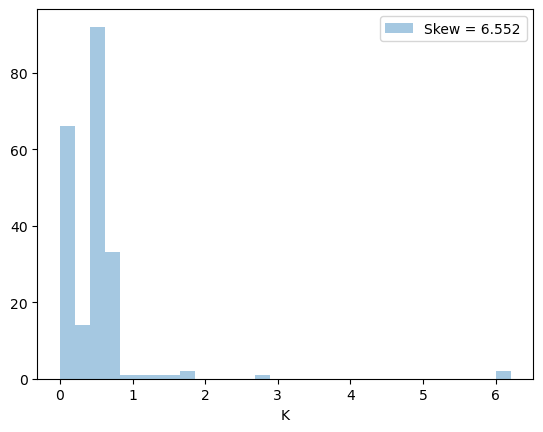

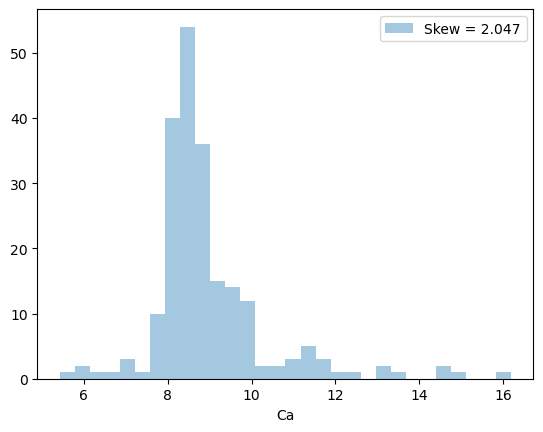

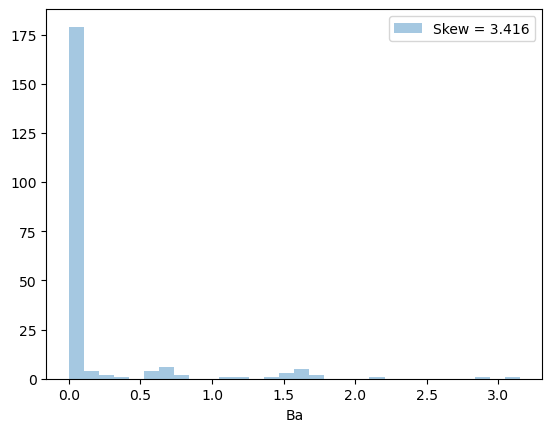

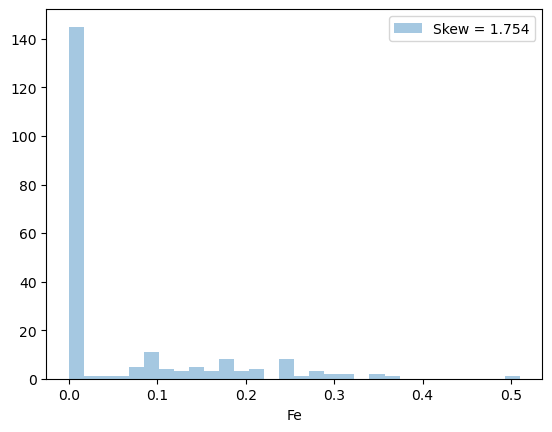

In [100]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label = "Skew = %.3f" %(skew),bins = 30)
    plt.legend(loc='best')
    plt.show()

#### None of the features is normally distributed. The features Fe, Ba, Ca and k exhibit the highest skew coefficients. moreover, the distribution of potassium(K), barium(Ba) seems to contain many outliers. Let's identify the indices of the observations containing outliers using Boxplot

#### Finding outliers 


#### Formula : [Q1 - 1.5 IQR , Q3 + 1.5 IQR] # outside the range of this considered as outliers

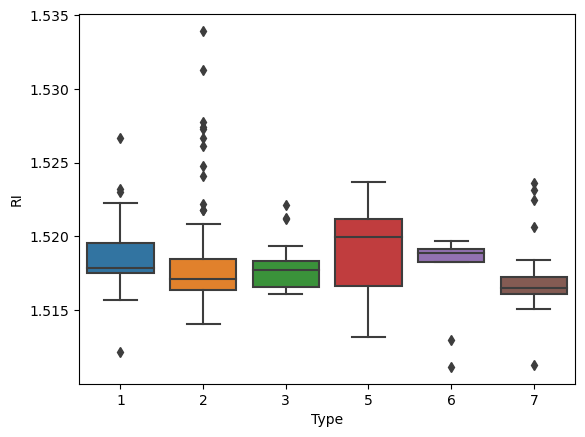

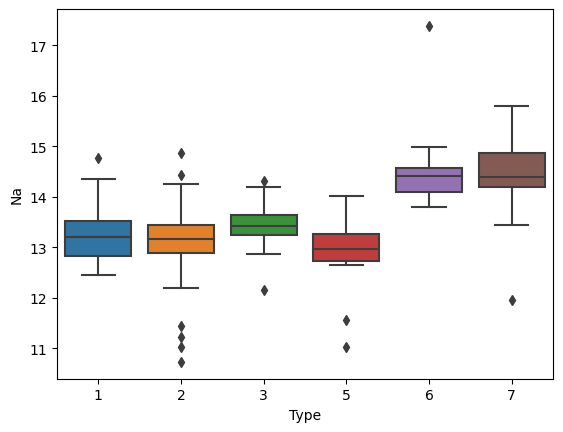

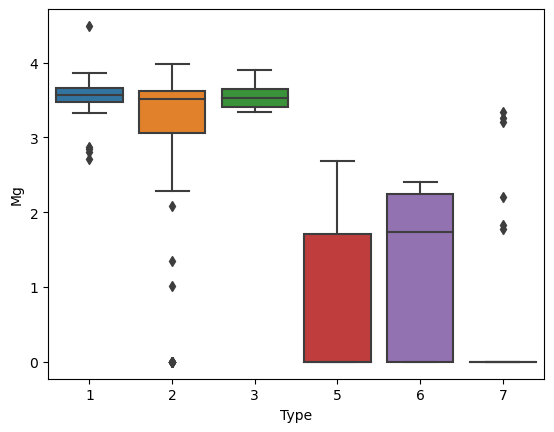

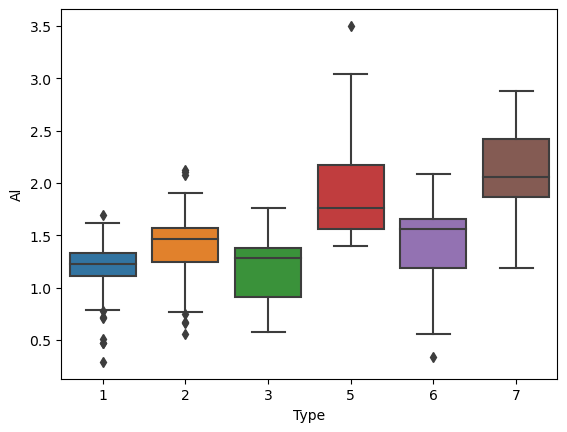

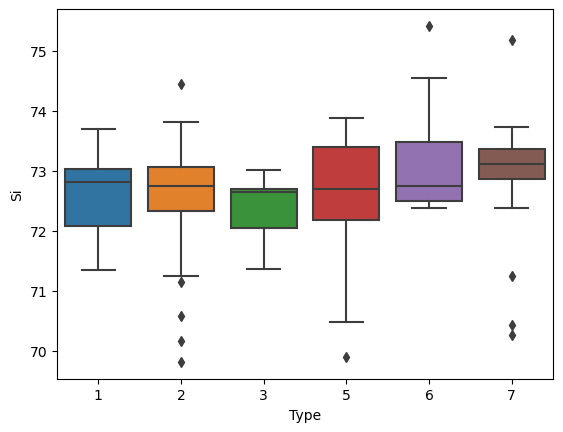

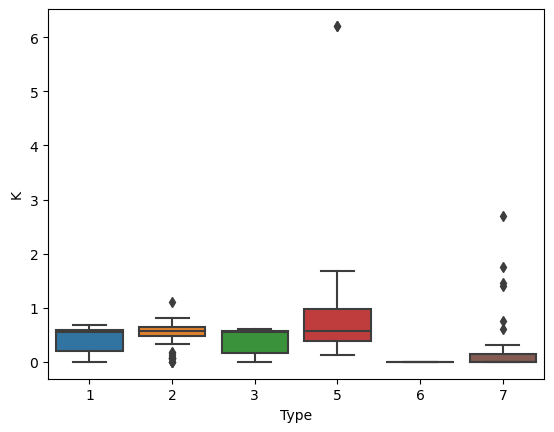

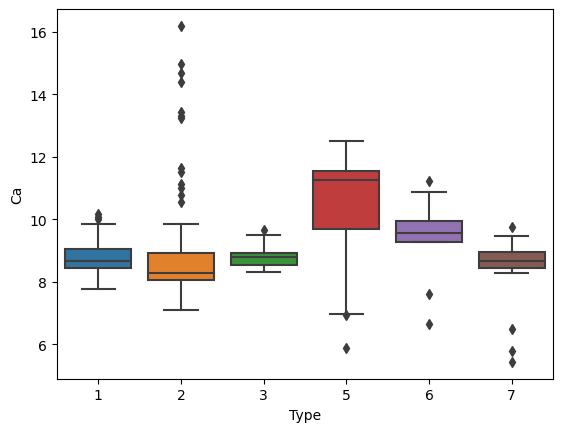

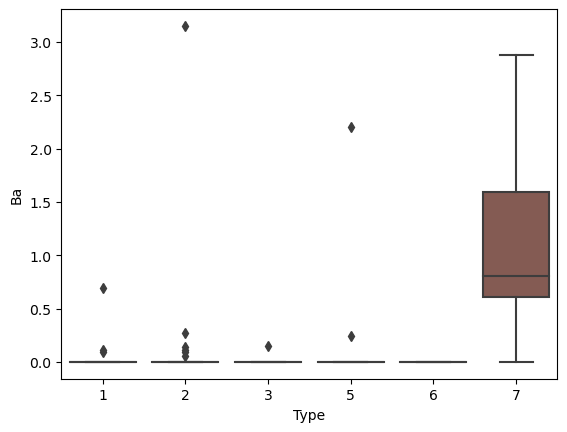

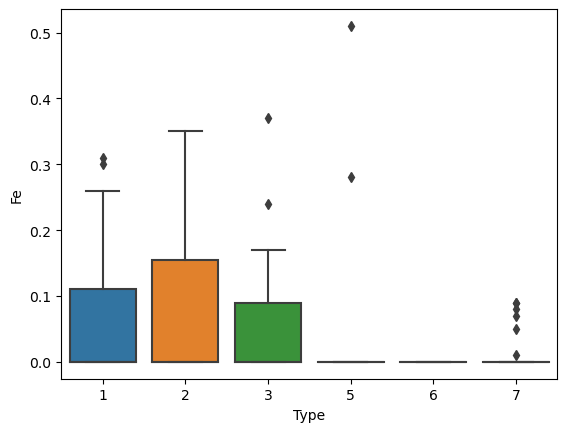

In [101]:
feature_names = df.columns
for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='Type', y=feature_names[i], data = df)

In [152]:
def outlier_hunt(df):
    outlier_indices = []
    for col in df.columns.tolist():
        Q1= np.percentile(df[col], 25) #1st quartile (25%)
        
        # 3rd quartile (75%)
        Q3= np.percentile(df[col], 75)
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        #outlier step
        outlier_step = 1.5* IQR
        #Determine a list of indices of outliers for feature col

        outlier_list_col =df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        # select observations containing more than 2 outliers
        outlier_indices = Counter(outlier_indices)
        multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
        return multiple_outliers
    
print('the dataset contains %d observation with more than 2 outliers' %(len(outlier_hunt(df[features]))))

the dataset contains 0 observation with more than 2 outliers


In [155]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [102]:
#the dimond shaped dots outside the boxplot indicates the outliers

In [103]:
#multivariate analysis

<Figure size 800x800 with 0 Axes>

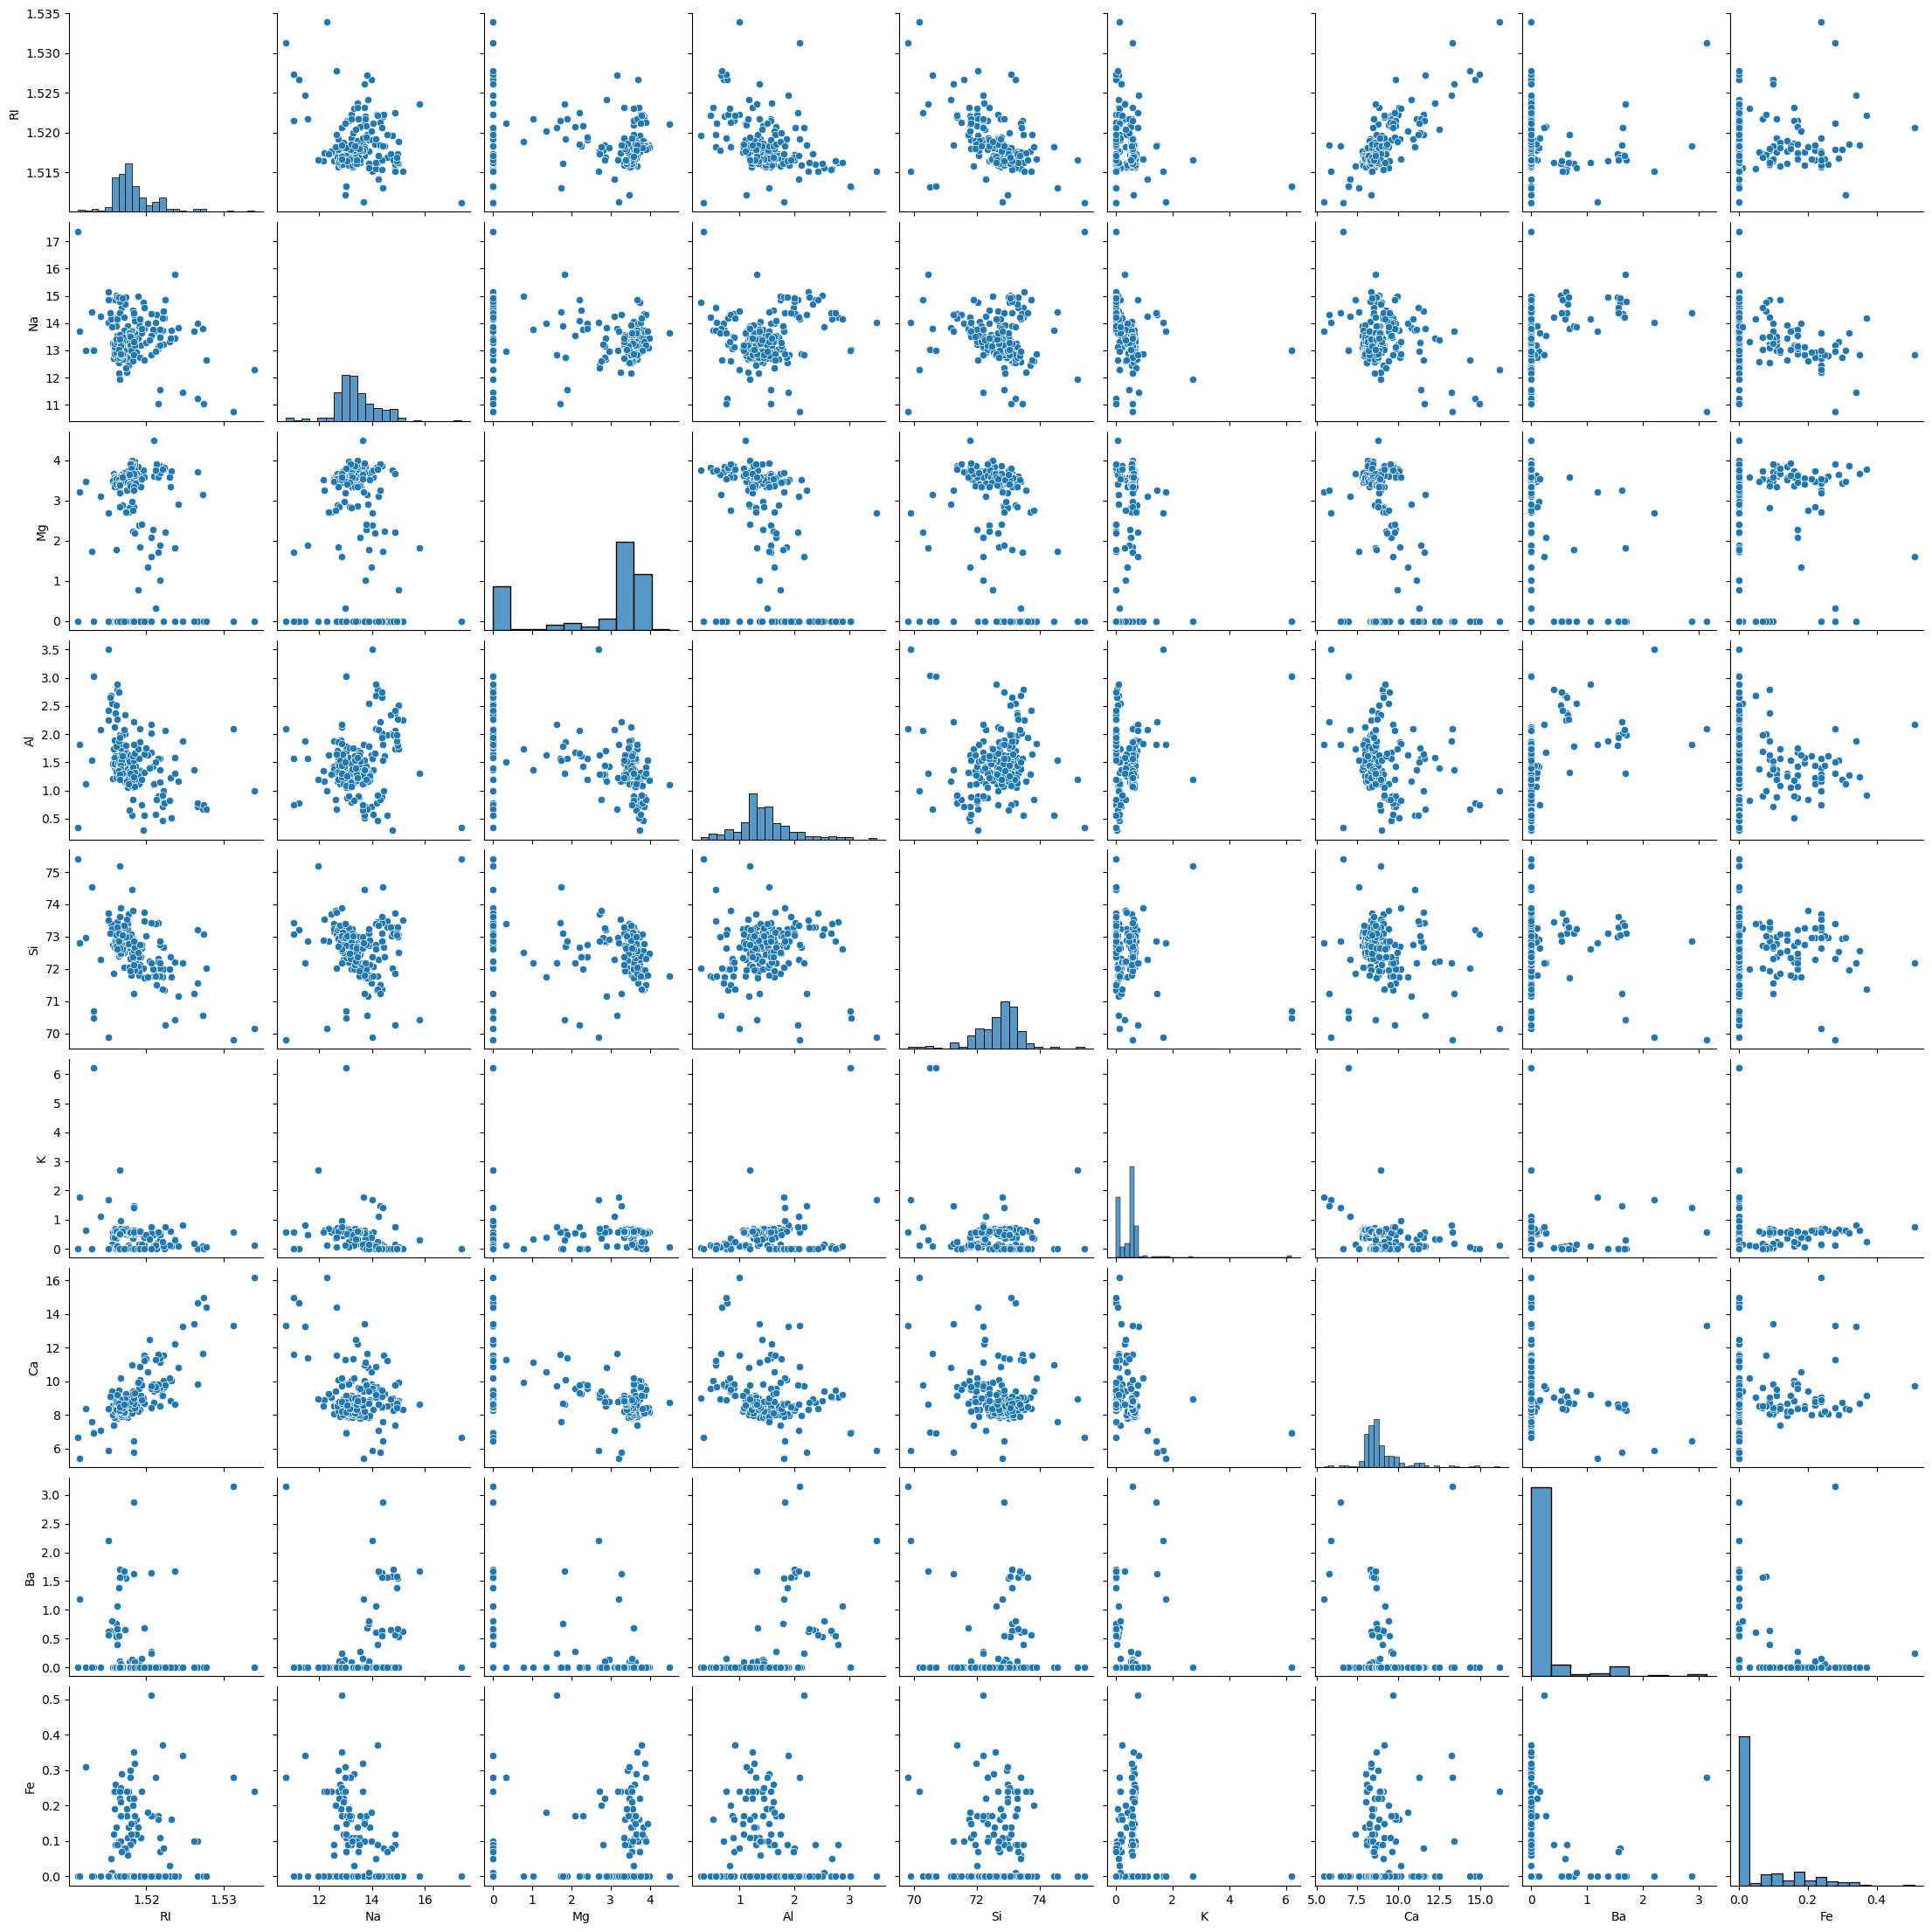

In [104]:
plt.figure(figsize=(8, 8))
sns.pairplot(df[features], palette='Paired', diag_kind='hist')
plt.show()

In [105]:
#check the correlation


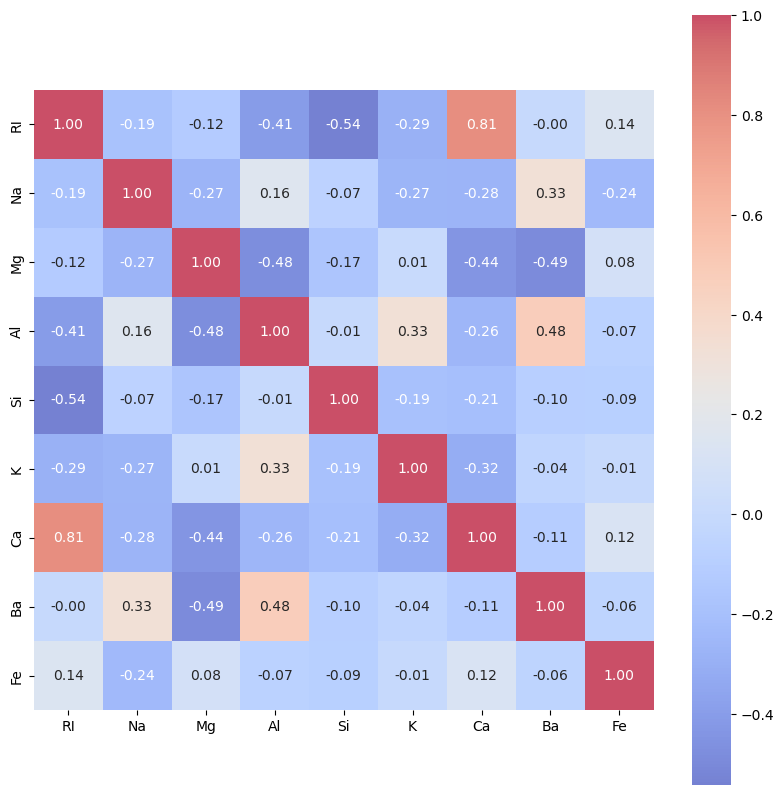

In [106]:
corr = df[features].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square = True, annot=True, fmt='.2f', annot_kws={'size': 10}, xticklabels=features, alpha=0.7, cmap='coolwarm')
plt.show()

#### there is some strong positive correlation between red areas in the sns chart.

## DATA PREPROCESSING

In [107]:
#identify missing values

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## MODELLING

In [118]:

y = df['Type']
del df['Type']

In [119]:
x = df

In [120]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=324)

In [121]:
x_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
12,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24
71,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
116,1.51829,13.24,3.90,1.41,72.33,0.55,8.31,0.00,0.10
173,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00


In [123]:
x_train.shape

(160, 9)

In [124]:
y_train.shape

(160,)

In [132]:
lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
svc=SVC()

In [138]:
model=[lg,dtc,rf,ad,svc,knn]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy_score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

accuracy_score: LogisticRegression()
0.5740740740740741
[[13  8  0  0  0  0]
 [ 6  8  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  2  0  1  0  1]
 [ 0  0  0  0  2  1]
 [ 0  0  0  0  0  7]]
              precision    recall  f1-score   support

           1       0.59      0.62      0.60        21
           2       0.40      0.57      0.47        14
           3       0.00      0.00      0.00         5
           5       1.00      0.25      0.40         4
           6       1.00      0.67      0.80         3
           7       0.78      1.00      0.88         7

    accuracy                           0.57        54
   macro avg       0.63      0.52      0.53        54
weighted avg       0.56      0.57      0.54        54

accuracy_score: DecisionTreeClassifier()
0.7777777777777778
[[17  3  0  0  1  0]
 [ 2 11  1  0  0  0]
 [ 3  0  2  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  0  7]]
              precision    recall  f1-score   support

           1       0.77      0.8

C:\Users\soumy\anaconda11\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\soumy\anaconda11\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soumy\anaconda11\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

In [139]:
#here dt and rfc are providing us the most accuracy

In [140]:
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('score:',m)
    print(score)
    print(score.mean())

C:\Users\soumy\anaconda11\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\soumy\anaconda11\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

score: LogisticRegression()
[0.58139535 0.6744186  0.51162791 0.53488372 0.5952381 ]
0.5795127353266889
score: DecisionTreeClassifier()
[0.62790698 0.55813953 0.58139535 0.51162791 0.64285714]
0.5843853820598006
score: RandomForestClassifier()
[0.72093023 0.72093023 0.60465116 0.65116279 0.71428571]
0.6823920265780732
score: AdaBoostClassifier()
[0.41860465 0.30232558 0.39534884 0.18604651 0.4047619 ]
0.3414174972314507
score: SVC()
[0.37209302 0.34883721 0.34883721 0.34883721 0.35714286]
0.3551495016611296
score: KNeighborsClassifier()
[0.53488372 0.62790698 0.60465116 0.58139535 0.71428571]
0.612624584717608


C:\Users\soumy\anaconda11\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\soumy\anaconda11\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [157]:
#decision Tree Classifier algorithm is scoring the best so we re going to consider it.
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)


DecisionTreeClassifier()

In [158]:
d_tree.score(x_train, y_train
            )

1.0

In [159]:
d_tree.score(x_test, y_test)

0.7777777777777778

In [161]:
y_pred_dt_test = d_tree.predict(x_test)

In [162]:
print("accuracy of Decision Tree Classifier model : ", accuracy_score(y_test, y_pred_dt_test))



accuracy of Decision Tree Classifier model :  0.7777777777777778


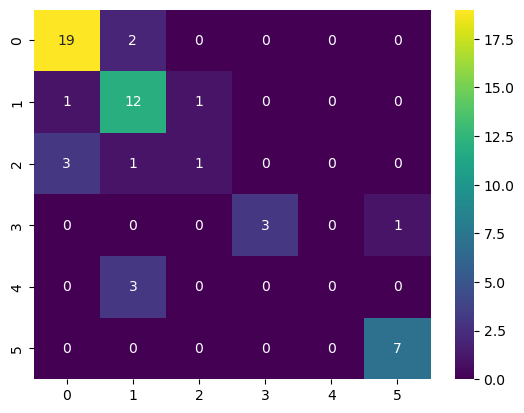

In [163]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap='viridis', fmt='.0f')
plt.show()

## creating model of DecisionTreeClassifier 

In [165]:
import pickle
filename = 'final_glass_prediction_model.pkl'
pickle.dump(d_tree, open(filename, 'wb'))

In [166]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.7777777777777778
